In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
#matplotlib inline

torch.manual_seed(1)    # reproducible
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = True   # set to False if you have downloaded

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray') # 행과 열을 가진 행렬 형태의 2차원 데이터를 imshow 명령을 써서 2차원 자료의 크기를 색깔로 표시하는 것
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
print(test_data.test_data[0].size())
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.  
print(test_x[0].size())
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]
print(test_y[0])




acc1 = []
acc2 = []
acc3 = []

acc_no_pool = []

acc_tanh = []
acc_sig = []
acc_relu = []

acc_adaDelta = []
acc_adaGrad = []
acc_RMS = []

acc_weighted = []

acc_xavier = []

acc_hidden_node = []

C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


<Figure size 640x480 with 1 Axes>

C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([28, 28])
torch.Size([1, 28, 28])


C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor(7)


In [2]:
acc1 = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc1.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3105 | test accuracy: 0.06
Epoch:  0 | train loss: 0.1270 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4052 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1942 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1270 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2244 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0242 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2164 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0433 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0551 | test accuracy: 0.9

# 1-2 change the current kernel size

In [3]:
acc2 = []

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=2,              # filter size
                stride=1,                   # filter movement/step
                padding=1,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 2, 1, 1),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN2()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc2.append(accuracy)

CNN2(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2971 | test accuracy: 0.11
Epoch:  0 | train loss: 0.5516 | test accuracy: 0.82
Epoch:  0 | train loss: 0.3171 | test accuracy: 0.89
Epoch:  0 | train loss: 0.0718 | test accuracy: 0.90
Epoch:  0 | train loss: 0.3150 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2915 | test accuracy: 0.93
Epoch:  0 | train loss: 0.4088 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1861 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2182 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0969 | test accuracy: 0.

In [4]:
acc3 = []

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN3()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc3.append(accuracy)

CNN3(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3095 | test accuracy: 0.27
Epoch:  0 | train loss: 0.3825 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2056 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1888 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0662 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1664 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0919 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1164 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0471 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0155 | test accuracy: 0.

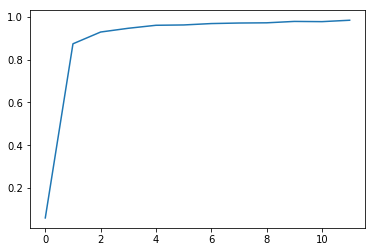

In [5]:
plt.plot(acc1)

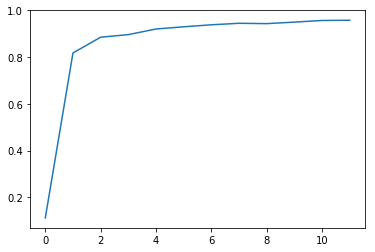

In [6]:
plt.plot(acc2)

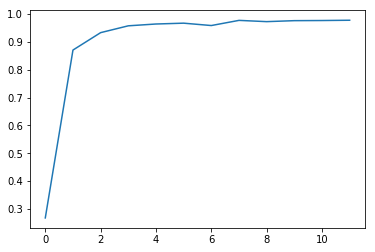

In [7]:
plt.plot(acc3)

# 커널 크기에 따른 결과에 큰 차이가 없습니다.

# 1-3 remove pooling layer

In [8]:
acc_no_pool = []

class CNN_no_pool(nn.Module):
    def __init__(self):
        super(CNN_no_pool, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            #nn.MaxPool2d(2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            #nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(6272*4, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN_no_pool()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_no_pool.append(accuracy)

CNN_no_pool(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (out): Linear(in_features=25088, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2970 | test accuracy: 0.09
Epoch:  0 | train loss: 0.6763 | test accuracy: 0.91
Epoch:  0 | train loss: 0.0938 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1895 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0693 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1134 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0319 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0977 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0397 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0675 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0831 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0446 | test accuracy: 0.98


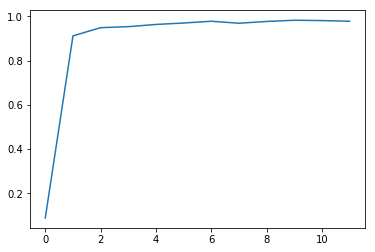

In [9]:
plt.plot(acc_no_pool)

# 1-4 change the current activation function to other activation function

In [10]:
acc_sig = []

class CNN_sig(nn.Module):
    def __init__(self):
        super(CNN_sig, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.Sigmoid(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.Sigmoid(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN_sig()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_sig.append(accuracy)

CNN_sig(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): Sigmoid()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): Sigmoid()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2862 | test accuracy: 0.11
Epoch:  0 | train loss: 2.2757 | test accuracy: 0.20
Epoch:  0 | train loss: 2.2075 | test accuracy: 0.15
Epoch:  0 | train loss: 0.7098 | test accuracy: 0.73
Epoch:  0 | train loss: 0.4569 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4401 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3258 | test accuracy: 0.88
Epoch:  0 | train loss: 0.1562 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2335 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2138 | test acc

In [11]:
acc_tanh = []

class CNN_tanh(nn.Module):
    def __init__(self):
        super(CNN_tanh, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.Tanh(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.Tanh(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN_tanh()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_tanh.append(accuracy)
plt.ioff()

CNN_tanh(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2906 | test accuracy: 0.15
Epoch:  0 | train loss: 0.5465 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1603 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1263 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0794 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0736 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0554 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0215 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0189 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0680 | test accuracy

In [12]:
acc_relu = []

class CNN_relu(nn.Module):
    def __init__(self):
        super(CNN_tanh, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN_tanh()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_relu.append(accuracy)

CNN_tanh(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3054 | test accuracy: 0.16
Epoch:  0 | train loss: 0.2112 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1766 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1066 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1180 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1638 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1533 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2035 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1364 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1087 | test accuracy

# 1-5 change the current optimization method

In [13]:
acc_adaDelta = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adadelta(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_adaDelta.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3030 | test accuracy: 0.05
Epoch:  0 | train loss: 2.2927 | test accuracy: 0.07
Epoch:  0 | train loss: 2.2919 | test accuracy: 0.11
Epoch:  0 | train loss: 2.2880 | test accuracy: 0.16
Epoch:  0 | train loss: 2.2827 | test accuracy: 0.21
Epoch:  0 | train loss: 2.2760 | test accuracy: 0.25
Epoch:  0 | train loss: 2.2688 | test accuracy: 0.28
Epoch:  0 | train loss: 2.2702 | test accuracy: 0.32
Epoch:  0 | train loss: 2.2305 | test accuracy: 0.33
Epoch:  0 | train loss: 2.2482 | test accuracy: 0.3

In [14]:
acc_adaGrad = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adagrad(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_adaGrad.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3163 | test accuracy: 0.17
Epoch:  0 | train loss: 0.8451 | test accuracy: 0.78
Epoch:  0 | train loss: 0.7046 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5899 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4309 | test accuracy: 0.87
Epoch:  0 | train loss: 0.5207 | test accuracy: 0.87
Epoch:  0 | train loss: 0.1697 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3678 | test accuracy: 0.88
Epoch:  0 | train loss: 0.4723 | test accuracy: 0.89
Epoch:  0 | train loss: 0.2788 | test accuracy: 0.8

In [15]:
acc_RMS = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.RMSprop(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_RMS.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3082 | test accuracy: 0.13
Epoch:  0 | train loss: 0.0761 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0680 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1281 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1105 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1878 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0573 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0382 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0041 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0547 | test accuracy: 0.9

# 1-6 choose Adam optimization method and use L2 (ridge) regularization method

In [16]:
acc_weighted = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR, weight_decay=1e-5)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_weighted.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3139 | test accuracy: 0.21
Epoch:  0 | train loss: 0.2453 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1654 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1349 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0533 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0611 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1256 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2215 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0834 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0273 | test accuracy: 0.9

# 1-7 add the Xavier weight initialization method

In [17]:
acc_xavier = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
        
        torch.nn.init.xavier_uniform_(self.out.weight)# apply xavier
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR, weight_decay=1e-5)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_xavier.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2899 | test accuracy: 0.13
Epoch:  0 | train loss: 0.3514 | test accuracy: 0.91
Epoch:  0 | train loss: 0.1813 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0874 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1428 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1298 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1149 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0467 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2927 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0580 | test accuracy: 0.9

# 1-8 choose ONE other parameters of CNN program (dropout)

In [18]:
#droptout을 추가했습니다.
acc_dropout = []

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=7,              # filter size
                stride=1,                   # filter movement/step
                padding=3                   # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 7, 1, 3),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2)              # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
        
        torch.nn.init.xavier_uniform_(self.out.weight)# apply xavier
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = nn.functional.dropout(x)        ###########Drop out###############
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR, weight_decay=1e-5)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            acc_dropout.append(accuracy)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3036 | test accuracy: 0.11
Epoch:  0 | train loss: 0.3322 | test accuracy: 0.86
Epoch:  0 | train loss: 0.1345 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1911 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2063 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0443 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0260 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1207 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0571 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0858 | test accuracy: 0.9

In [21]:
acc_list = [acc1,acc2,acc3,acc_no_pool,acc_tanh,acc_sig,acc_relu,acc_adaDelta,acc_adaGrad,acc_RMS,acc_weighted,acc_xavier,acc_dropout]

['acc1']
max accuracy :  0.9835
mean accuracy :  0.882
max - mean :  0.102

['acc2']
max accuracy :  0.958
mean accuracy :  0.855
max - mean :  0.103

['acc3']
max accuracy :  0.9775
mean accuracy :  0.900
max - mean :  0.078

['acc_no_pool']
max accuracy :  0.982
mean accuracy :  0.891
max - mean :  0.091

['acc_tanh']
max accuracy :  0.9805
mean accuracy :  0.889
max - mean :  0.092

['acc_sig']
max accuracy :  0.9385
mean accuracy :  0.701
max - mean :  0.238

['acc_relu']
max accuracy :  0.98
mean accuracy :  0.891
max - mean :  0.089

['acc_adaDelta']
max accuracy :  0.4245
mean accuracy :  0.251
max - mean :  0.173

['acc_adaGrad']
max accuracy :  0.895
mean accuracy :  0.808
max - mean :  0.087

['acc_RMS']
max accuracy :  0.982
mean accuracy :  0.897
max - mean :  0.085

['acc_weighted']
max accuracy :  0.9765
mean accuracy :  0.901
max - mean :  0.076

['acc_xavier']
max accuracy :  0.981
mean accuracy :  0.892
max - mean :  0.089

['acc_dropout']
max accuracy :  0.9745
mean a

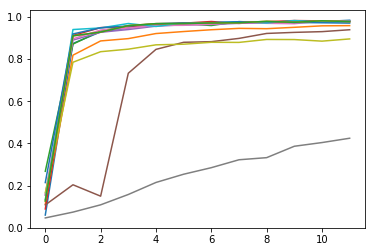

In [22]:
import inspect


def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


for i in range(len(acc_list)-1):
    
    print(retrieve_name(acc_list[i]))
    _max = max(acc_list[i])
    print("max accuracy : ",_max)
    
    _mean = "%0.3f"%(sum(acc_list[i])/len(acc_list[i]))
    print("mean accuracy : ", _mean)
    
    sub = "%0.3f"%(float(_max) - float(_mean))
    print("max - mean : ", sub)
    
    plt.plot(acc_list[i])
    print()
    
print([retrieve_name(acc_list[len(acc_list)-1])[0]])
print("max accuracy : ",max(acc_list[len(acc_list)-1]))
print("mean accuracy : ", "%0.3f"%(sum(acc_list[len(acc_list)-1])/len(acc_list[len(acc_list)-1])))
plt.plot(acc_list[i])